# 1. Descriptive statistics

## 1.1. Quantiles

In [4]:
library(tidyverse)
library(readxl)

Warning message:
"package 'tidyverse' was built under R version 4.0.4"


ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.4.7 is already loaded, but >= 0.4.10 is required


In [13]:
mtcars %>% select(mpg, disp) %>% summary

      mpg             disp      
 Min.   :10.40   Min.   : 71.1  
 1st Qu.:15.43   1st Qu.:120.8  
 Median :19.20   Median :196.3  
 Mean   :20.09   Mean   :230.7  
 3rd Qu.:22.80   3rd Qu.:326.0  
 Max.   :33.90   Max.   :472.0  

In [14]:
mtcars$mpg %>% quantile(seq(0, 1, by=0.1))

0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 
10.40 14.34 15.20 15.98 17.92 19.20 21.00 21.47 24.08 30.09 33.90

In [15]:
# mean of 90% center values
mean(mtcars$mpg, trim=0.1)

[1] 19.69615

In [16]:
# interquantile range
rnorm(1000, mean=0, sd=2) %>% IQR()

[1] 2.640198

In [17]:
# standard deviation
rnorm(1000, 0, 3) %>% sd()

[1] 2.981235

## 1.2. Correlation

In [18]:
library(tidyverse)
library(readxl)

#### Pearson coefficient
Pearson's correlation assesses linear relationship between two variables.

In [19]:
correlation <- read.csv('data/correlation.csv')
cor(correlation)

,drink,travel,restaurant
drink,1.00000000,-0.02156269,0.95176075
travel,-0.02156269,1.00000000,-0.01245761
restaurant,0.95176075,-0.01245761,1.00000000


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



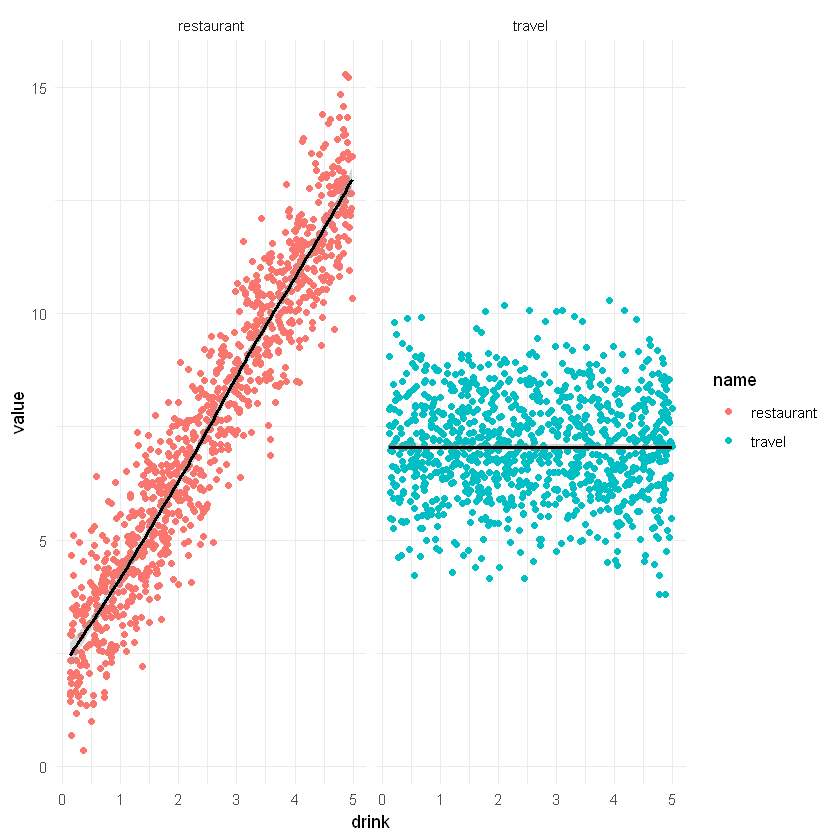

In [20]:
correlation %>% 
    pivot_longer(cols=c(travel, restaurant)) %>%
    ggplot() +
    aes(x=drink, y=value) +
    geom_point(aes(color=name)) +
    facet_wrap(~name) +
    geom_smooth(color='black') +
    theme_minimal()

#### Spearman coefficient
Spearman coefficient measures rank correlation instead of value correlation.

In [21]:
hnx <- c(220,218,216,217,215,213,219,236,237,235)
hose <- c(151,150,148,149,147,146,152,165,162,161)

stock <- data.frame(hnx, hose)
stock %>% head(3)

,hnx,hose
,<dbl>,<dbl>
1,220,151
2,218,150
3,216,148


In [22]:
cor(stock, method='spearman')

,hnx,hose
hnx,1.0000000,0.9757576
hose,0.9757576,1.0000000


# 2. Hypothesis testing
Hypothesis testing is a method of statistical inference which is built upon distributions. The approach of this technique is to test the validity of a claim about the population using sample data. Hypothesis testing takes into account the following concepts:

#### The hypotheses
- The null hypothesis (denoted $\mbox{H}_0$): the common view whose validity needs to be tested.
- The alternative hypothesis (denoted $\mbox{H}_1$): what will be believed if $\mbox{H}_0$ is rejected. $H_1$ can be either $x\neq x_0$, $x<x_0$ or $x>x_0$.

#### Significance level
Significant level (denoted $\alpha$) is the probability of rejecting the null hypothesis. Common values for significant level are $\alpha=0.05$ or $\alpha=0.01$. A related concept is the confidence level ($\gamma=1-\alpha$).

#### Test statistic
Test statistic is a number calculated from the data, which is used to perform the test. The math behind the computing of test statistic ensures it follows a specific dsitribution. Each test statistic is represented by a fraction where the numerator is the signal and the denominator is the noise.

#### p-value
Using test statistic $t$ and its probability disribution function $f(x)$, p-value can be calculated as either $2P(x>|t|)$, $P(x<-t)$ or $P(x>t)$ depends on $\mbox{H}_1$. p-value is the evidence against $\mbox{H}_0$; the smaller the p-value is, the stronger evidence that you should reject $\mbox{H}_0$.
- A p-value less than 0.05 indicates the difference is significant, meaning there is a probability of less than 5% that the null hypothesis is correct. Therefore, we reject $\mbox{H}_0$ and accept $\mbox{H}_1$.
- A p-value higher than 0.05 indicates the difference is not significant. This case we reject $\mbox{H}_1$ and are failed to reject $\mbox{H}_0$.

#### Descriptive statistics
For populations:
- $N$: population size
- $\mu$: population mean
- $\sigma$: population standard deviation
- $\sigma^2$: population variance
- $p$: propotion of successes in population

For samples:
- $n$: sample size
- $\hat\mu$ or $\bar x$: sample mean
- $\hat\sigma$: sample standard deviation
- $\hat\sigma^2$: sample variance
- $\hat p$: propotion of successes in sample

## 2.1. Z-test

In [23]:
library(tidyverse)
library(readxl)

In [24]:
df <- read_excel('data/hypothesis.xlsx')
head(df)

Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,central,female,69,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
2,southern,female,50,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
3,northern,male,73,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
4,northern,female,73,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
5,central,male,69,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3
6,northern,female,72,elder,12,highshool,sale,0,0,...,01/05/2013,0,5,5,2,2,5,5,2,2


#### Mean z-test
Usage: Comparing the mean of one or two populations.

Assumptions:
- Populations are normally distributed
- Samples are random and have at least 30 observations
- Population variances are known

**Problem:** Given a random sample sized $n=500$ of people's income from a population having the standard deviation $\sigma=5000$. With the significant level  $\alpha=0.05$, can we conclude that the mean of the population $\mu=A=14000$?

First, state the hypotheses from the information:
- $\mbox{H}_0: \mu = 14000$
- $\mbox{H}_1: \mu \neq 14000$

Since we are doing a two-tailed test, the critical value will be $z_{\alpha/2}=z_{0.025} = 1.96$. If $|Z|>1.96$, reject $\mbox{H}_0$ and accept $\mbox{H}_1$. However in this example, $|Z|=0.63$ and the corresponding p-value $=0.5287$, so $\mbox{H}_0$ cannot be rejected. The formula for test statistic is:

$$Z = \frac{\hat{\mu}-A}{\sigma/\sqrt{n}}$$

In [25]:
sample = df$income

n = sample %>% length
mu = sample %>% mean
sd = 5000

z = (mu - 14000) / (sd / sqrt(n))
z %>% abs

[1] 0.6277984

**Problem:** The average income of male is $5000$ higher than female, true or false? Given $\alpha = 0.05$, population standard deviations of income of male and female are $\sigma_1=7000$ and $\sigma_2=5000$, consecutively.

The hypotheses:
- $\mbox{H}_0: \mu_1 = \mu_2+5000$
- $\mbox{H}_1: \mu_1 > \mu_2+5000$

This is a right-tailed test, $z_{\alpha}=z_{0.05} = 1.64$ will be taken. If $Z>1.64$, reject $\mbox{H}_0$ and conclude that the average income of male is higher than female. In this example, $Z=2.57$ and the corresponding p-value is $0.0051$. The formula for test statistic is:

$$Z = \frac{\hat{\mu}_1-\hat{\mu}_2-A}{\sqrt{\sigma_1^2/n_1+\sigma_2^2/n_2}}$$

In [26]:
sample1 = (df %>% filter(gender=='male'))$income
sample2 = (df %>% filter(gender=='female'))$income

n1 = sample1 %>% length
n2 = sample2 %>% length
mu1 = sample1 %>% mean
mu2 = sample2 %>% mean
sd1 = 7000
sd2 = 5000

z = (mu1 - mu2 - 5000) / sqrt((sd1**2/n1) + (sd2**2/n2))
z

[1] 2.573479

#### Proportion z-test
Usage: Comparing the proportion of one or two populations.

Assumptions:
- Populations are normally distributed
- Samples are random and have at least 30 observations

**Problem:** In a large consignment of food packets, a random sample of $n=100$ packets revealed that 5 packets were leaking. Can we conclude that the population contains at least $A=10\%$ of leaked packets at $\alpha=0.05$?

The hypotheses:
- $\mbox{H}_0: p\geq0.1$
- $\mbox{H}_1: p<0.1$

This is a left-tailed test, $\mbox{H}_0$ will be rejected if $Z<-z_{0.05}=-1.64$. For $Z=-2.294$, the corresponding p-value is $0.011$ ($<0.05$). The formula for test statistic is:

$$Z = \frac{\hat{p}-A}{\sqrt{\hat{p}(1-\hat{p})/n}}$$

In [27]:
n = 100
p = 5/100

z = (p - 0.1) / sqrt(p * (1-p) / n)
z

[1] -2.294157

**Problem:** A machine turns out 16 imperfect articles in a sample of $n_1=500$. After maintaining, it turns 3 imperfect articles in a sample of $n_2=100$. Has the machine improved after maintaining at significance level $\alpha=0.05$?

The hypotheses:
- $\mbox{H}_0: p_1=p_2$
- $\mbox{H}_1: p_1>p_2$

If $Z>z_{0.05}=1.64$, reject $\mbox{H}_0$. The formula for test statistic is:

$$Z = \frac{\hat{p}_1-\hat{p}_2-A}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1}+\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}}$$

In [28]:
n1 = 500
n2 = 100
p1 = 16/500
p2 = 3/100

z = (p1 - p2) / sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
z

[1] 0.1064565

## 2.2. F-test

Usage:
- Comparing the variances of two populations
- Being used in one-way ANOVA to compare means between groups (section 2.4)
- Being used in multivariate linear regression to testing the significant of R-squared (section 3.2)

Assumption:
- Populations are normally distributed
- Two random independent samples

In [ ]:
library(tidyverse)
library(readxl)

In [ ]:
df <- read_excel('data/hypothesis.xlsx')
df %>% head

**Problem:** With the significance level $\alpha=0.05$, compare the population variances of income of male and female.

The hypotheses:
- $\mbox{H}_0: \sigma^2_1 = 5\sigma^2_2$
- $\mbox{H}_1: \sigma^2_1 > 5\sigma^2_2$

If p-value $<0.05$: reject $\mbox{H}_0$. The formula for test statistic is:

$$F = \frac{1}{A}\frac{\hat{\sigma}_1^2}{\hat{\sigma}_2^2}$$

In [31]:
sample1 = (df %>% filter(gender=='male'))$income
sample2 = (df %>% filter(gender=='female'))$income

var.test(sample1, sample2, ratio=5, alternative='greater', conf.level=0.95)


	F test to compare two variances

data:  sample1 and sample2
F = 1.2719, num df = 270, denom df = 228, p-value = 0.03028
alternative hypothesis: true ratio of variances is greater than 5
95 percent confidence interval:
 5.151238      Inf
sample estimates:
ratio of variances 
          6.359427 


## 2.3. T-test

In [32]:
library(tidyverse)
library(readxl)

In [33]:
df <- read_excel('data/hypothesis.xlsx')
df %>% head

Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,central,female,69,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
2,southern,female,50,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
3,northern,male,73,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
4,northern,female,73,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
5,central,male,69,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3
6,northern,female,72,elder,12,highshool,sale,0,0,...,01/05/2013,0,5,5,2,2,5,5,2,2


#### One-sample mean t-test
Usage: To compare the mean of a population when its variance is unknown.

Assumption:
- The population is normally distributed
- The sample is random

**Problem:** With the confidence level $\alpha=0.05$, the mean of income is $13000$ or not?

The hypotheses:
- $\mbox{H}_0: \mu=13000$
- $\mbox{H}_1: \mu\neq13000$

The formula for test statistic is:

$$T = \frac{\hat{\mu}-A}{\hat\sigma/\sqrt{n}}$$

In [34]:
sample = df$income
t.test(sample, mu=13000, alternative='two.sided')


	One Sample t-test

data:  sample
t = 2.6905, df = 499, p-value = 0.007374
alternative hypothesis: true mean is not equal to 13000
95 percent confidence interval:
 13231.88 14487.36
sample estimates:
mean of x 
 13859.62 


#### Independent samples mean t-test
Usage: To compare the means of two population using their independent samples. A f-test should be used first to check the equality of the two population variances.

Assumptions:
- Two populations are normally distributed
- Two samples are independent and random
- Two variances are equal

**Problem:** With $\alpha=0.05$, the average income of male and female are equal, true or false?

The hypotheses:
- $\mbox{H}_0: \mu_1 = \mu_2$
- $\mbox{H}_1: \mu_1 \neq \mu_2$

If $\sigma_1^2 \neq \sigma_2^2$ (this example - already tested in section 2.2), the formula for test statistic is:

$$T = \frac{\hat{\mu}_1-\hat{\mu}_2-A}{\sqrt{\frac{\hat{\sigma}_1^2}{n_1}+\frac{\hat{\sigma}_2^2}{n_2}}}$$

If $\sigma_1^2 = \sigma_2^2$, the test statistic is:

$$T = \frac{\hat{\mu}_1-\hat{\mu}_2-A}{\hat\sigma_p \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$$

where

$$\hat\sigma_p = \sqrt{\frac{(n_1-1)\hat{\sigma}_1^2 + (n_2-1)\hat{\sigma}_2^2}{n_1+n_2-2}}$$

is the pooled standard deviation of the two samples.

In [35]:
sample1 = (df %>% filter(gender=='male'))$income
sample2 = (df %>% filter(gender=='female'))$income

t.test(sample1, sample2, var.equal=FALSE)


	Welch Two Sample t-test

data:  sample1 and sample2
t = 11.817, df = 364.87, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5323.120 7448.517
sample estimates:
mean of x mean of y 
 16784.32  10398.51 


In [36]:
t.test(df$income ~ df$gender, var.equal=FALSE)


	Welch Two Sample t-test

data:  df$income by df$gender
t = -11.817, df = 364.87, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7448.517 -5323.120
sample estimates:
mean in group female   mean in group male 
            10398.51             16784.32 


**Problem:** Compare the average income of higher education group (at least 15 years) over the other group.

In [37]:
var.test(df$income ~ (df$year_of_school>=15))


	F test to compare two variances

data:  df$income by df$year_of_school >= 15
F = 0.068841, num df = 262, denom df = 236, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.05360573 0.08826216
sample estimates:
ratio of variances 
        0.06884143 


In [38]:
# sample 1 will be group FALSE, sample 2 will be group TRUE
t.test(df$income ~ (df$year_of_school>=15), var.equal=FALSE, alternative='less')


	Welch Two Sample t-test

data:  df$income by df$year_of_school >= 15
t = -13.275, df = 265.27, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -6614.743
sample estimates:
mean in group FALSE  mean in group TRUE 
           10279.03            17833.02 


#### Paired samples mean t-test
Usage: Comparing two population means, given their dependent samples. A paired samples t-test calculates the diffrence between paired observation and then performs a one-sample t-test.

Assumptions:
- The two populations should be both normally distributed
- The two random samples come in pairs (before and after data for example)
- Same sample sizes

In [39]:
weight = data.frame(
    before = c(72,77,84,79,74,67,74,77,79,89),
    after = c(65,68,77,73,66,61,66,71,71,78)
)

**Problem:** With $\alpha=0.05$, the average weight after is 8 kg less than before, true or false?

The hypotheses:
- $\mbox{H}_0: \mu_1-\mu_2\geq8$
- $\mbox{H}_1: \mu_1-\mu_2<8$

The test statistic is:

$$F = \frac{\hat\mu_1-\hat\mu_2-A}{\hat\sigma_d/\sqrt n} = \frac{\hat\mu_d-A}{\hat\sigma_d/\sqrt n}$$
where
- $\hat\mu_d$ is the sample mean of the differences
- $\hat\sigma_d$ is the sample standard deviation of the differences

In [40]:
sample1 = weight$before
sample2 = weight$after

t.test(sample1, sample2, mu=8, pair=TRUE, alternative='less')


	Paired t-test

data:  sample1 and sample2
t = -0.80178, df = 9, p-value = 0.2217
alternative hypothesis: true difference in means is less than 8
95 percent confidence interval:
     -Inf 8.514517
sample estimates:
mean of the differences 
                    7.6 


## 2.4. Chi-squared test
Usage:
- Comparing the propotions of two or more populations
- Independence testing between qualitative variables

Assumptions:
- Populations are normally distributed

In [41]:
library(tidyverse)
library(readxl)

In [42]:
df <- read_excel('data/hypothesis.xlsx')
df %>% head

Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,central,female,69,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
2,southern,female,50,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
3,northern,male,73,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
4,northern,female,73,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
5,central,male,69,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3
6,northern,female,72,elder,12,highshool,sale,0,0,...,01/05/2013,0,5,5,2,2,5,5,2,2


#### Dependence chi-squared test
**Problem**: Is there a relationship between `age_group` and `degree`?

The hypotheses:
- $\mbox{H}_0:$ The two variables are independent
- $\mbox{H}_1:$ The two variables are dependent

`age_group` and `degree` are said to be strongly related if p-value $<0.05$.

In [43]:
var1 <- df$age_group
var2 <- df$degree

chisq.test(var1, var2)


	Pearson's Chi-squared test

data:  var1 and var2
X-squared = 84.746, df = 4, p-value < 2.2e-16


#### Propotion chi-squared test
**Problem**: The number of officer is equal to the number of salesperson and 5 times greater than the number of managers, true or false?

- $\mbox{H}_0: p_1=1/11, p_2=p_3=5/11$
- $\mbox{H}_1$: There is at least one incorrect equation.

If p-value $<0.05$ then reject $\mbox{H}_0$.

In [44]:
apr1 <- df %>% group_by(job) %>% summarise(count=n())
apr1

`summarise()` ungrouping output (override with `.groups` argument)



job,count
<chr>,<int>
manager,44
officer,239
sale,217


In [45]:
prop.test(
    apr1$count,
    n=c(500, 500, 500),
    p=c(1/11, 5/11, 5/11))


	3-sample test for given proportions without continuity correction

data:  apr1$count out of c(500, 500, 500), null probabilities c(1/11, 5/11, 5/11)
X-squared = 2.0119, df = 3, p-value = 0.5699
alternative hypothesis: two.sided
null values:
    prop 1     prop 2     prop 3 
0.09090909 0.45454545 0.45454545 
sample estimates:
prop 1 prop 2 prop 3 
 0.088  0.478  0.434 


## 2.5. ANOVA
ANOVA (Analysis of Variance) is a technique involving a collection of statistical tests analyzing the difference of the means of two or more groups. The means is calculated from a quantitative variable; the groups are determined using qualitative variables.

#### One-factor ANOVA
Usage: Compare multiple population means when you have one categorical variable containing at least three categories.

Assumptions:
- Populations are normally distributed
- Samples are random
- Homogeneity of variances

The work flow:
1. Test the homogeneity of variances, using one of the following test:
    - Bartlett test (`bartlett.test()` function)
    - Levene test (`car::leveneTest()` function)
    - Fligner-Killeen test (`fligner.test()` function)
2. Test the equality of population means:
    - If the variances are equal, use the `aov()` function
    - If the variances are not equal, use the `oneway.test()` function
3. Post-hoc test to compare pairwise population means, using the `userfriendlyscience::oneway()` function:
    - If the variances are equal, use Tukey HSD test (`posthoc='tukey'`)
    - If the variances are not equal, use Games-Howell test (`posthoc='games-howell'`)

In [46]:
library(tidyverse)
library(readxl)

In [47]:
df <- read_excel('data/hypothesis.xlsx')
df %>% head

Code,area,gender,age,age_group,year_of_school,degree,job,know_english,know_france,...,flight_date,flight_status,professionally_staff,customer_service,diversity_product,good_price,easily_transaction,goodlooking_staff,diversity_flighttime,good_construction
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,central,female,69,middle,16,master,manager,1,1,...,01/05/2013,1,2,2,1,1,2,2,1,1
2,southern,female,50,middle,12,highshool,officer,0,0,...,01/05/2013,1,3,3,3,2,3,3,2,3
3,northern,male,73,elder,12,highshool,officer,1,0,...,01/05/2013,1,2,2,1,2,3,5,1,1
4,northern,female,73,elder,12,highshool,officer,0,0,...,01/05/2013,1,5,3,2,4,5,3,2,2
5,central,male,69,middle,16,master,officer,1,0,...,01/05/2013,0,3,3,3,3,3,3,3,3
6,northern,female,72,elder,12,highshool,sale,0,0,...,01/05/2013,0,5,5,2,2,5,5,2,2


**Problem:** Is there a difference in average income between 3 areas (Central, Southern and Northern)? If there is, which group differs from the others?

**Step 1:** Check the equality of population variances. If p-value $<0.05$, then reject $\mbox{H}_0$. The hypotheses:
- $\mbox{H}_0: \sigma_1^2 = \sigma_2^2 = \dots = \sigma_k^2$
- $\mbox{H}_1:$ Exist at least one pair $\sigma_i^2 \neq \sigma_j^2 $ where $i \neq j$

In [48]:
bartlett.test(income ~ area, data=df)


	Bartlett test of homogeneity of variances

data:  income by area
Bartlett's K-squared = 865.48, df = 2, p-value < 2.2e-16


In [49]:
fligner.test(income ~ area, data=df)


	Fligner-Killeen test of homogeneity of variances

data:  income by area
Fligner-Killeen:med chi-squared = 243.66, df = 2, p-value < 2.2e-16


**Step 2:** Test wether the population means are equal or not. If p-value $<0.05$, then reject $\mbox{H}_0$. The hypothese:
- $\mbox{H}_0: $\mu_1 = \mu_2 = \dots = \mu_k$
- $\mbox{H}_1: There is at least one pair $\mu_i \neq \mu_j $ where $i \neq j$

In [50]:
aov(income ~ area, data=df) %>% summary

             Df    Sum Sq   Mean Sq F value Pr(>F)    
area          2 1.202e+10 6.012e+09   222.2 <2e-16 ***
Residuals   497 1.345e+10 2.705e+07                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [51]:
oneway.test(income ~ area, data=df)


	One-way analysis of means (not assuming equal variances)

data:  income and area
F = 441.89, num df = 2.00, denom df = 283.47, p-value < 2.2e-16


**Step 3:** Post-hoc test to compare pairwise means. Any pair having p-value $<0.05$ can be considered significantly diffrerent in mean. Notice that the `oneway()` funtion from the `userfriendlyscience` library includes all neccessary tests for 3 steps.

In [12]:
version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [5]:
install.packages('userfriendlyscience',
                  contriburl='https://userfriendlyscience.com/src/contrib',
                  type='win.binary', dependencies=TRUE)

Installing package into 'E:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"dependency 'fBasics' is not available"


package 'userfriendlyscience' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpwZEu7H\downloaded_packages


In [7]:
install.packages('fBasics')

Installing package into 'E:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'timeSeries', 'spatial', 'gss', 'stabledist'




package 'timeSeries' successfully unpacked and MD5 sums checked
package 'spatial' successfully unpacked and MD5 sums checked
package 'gss' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpwZEu7H\downloaded_packages


In [9]:
install.packages('foreign')

Installing package into 'E:/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'foreign' is not available (for R version 3.6.1)"


In [8]:
library(userfriendlyscience)
oneway(df$income, df$area, posthoc='games-howell', levene=TRUE)

ERROR: Error: package or namespace load failed for 'userfriendlyscience' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'


## 2.6. Distribution test
The Kolmogorov-Smirnov test (KS test) is used to test whether a random variable follows a specific distribution or not. The test statistic is calculated as the difference between the empirical CDF of the observed variable and the CDF of the reference distribution. In R, the `ks.test()` function performs Kolmogorov-Smirnov test.

Here are the popular distributions that `ks.test()` supports:

Distribution|R function|Parameters         |
:-----------|:---------|:------------------|
Binomial    |`pbinom`  |`size`, `prob`     |
Poisson     |`ppois`   |`lambda`           |
Unifrom     |`punif`   |`min`, `max`       |
Normal      |`pnorm`   |`mean`, `sd`       |
Cauchy      |`pcauchy` |`location`, `scale`|
T           |`pt`      |`df`               |
F           |`pf`      |`df1`, `df2`       |
Chi-squared |`pchisq`  |`df`               |
Exponential |`pexp`    |`rate`             |
Beta        |`pbeta`   |`shape1`, `shape2` |
Gamma       |`pgamma`  |`shape`, `scale`   |

In [ ]:
library(tidyverse)
library(readxl)

In [ ]:
x = rnorm(n=1000, mean=0, sd=2)
ks.test(x, pnorm, mean=0, sd=2)

## Summary
Type  |Usage| Test statistic             
:----------|:--------------|:--------------------------
Z-test|1. Comparing the means of 1 or 2 populations <br> 2. Comparing the proportions of 1 or 2 populations|$Z$|
F-test|Comparing the variances of 2 populations|$F$|
T-test|Comparing the means of 1 or 2 populations|$T$|
Chi-squared test|1. Comparing the propotions of 3 or more populations <br> 2. Testing of qualitative variables replationship|$\chi^2$|
ANOVA|Comparing the means of 3 population or more|$F$|
KS test|Testing of distribution|$D$|

# 3. Regression

In [ ]:
library(tidyverse)
library(readxl)

In [ ]:
df <- read_excel('data/hypothesis.xlsx')
df %>% head

## 3.1. Simple linear regression

In [ ]:
model <- lm(income ~ year_of_school, data=df)
model %>% summary

In [ ]:
# predict income for other years of school
new.income <- data.frame(year_of_school=c(10, 16))
predict(model, new.income)

## 3.2. Multivariate linear regression

**Problem:**
1. Wrtie the regression function representing how the two variables `year_of_school` and `age` affect `income`.
2. Predict income of a person who have 16 years of school and 40 years old

In [ ]:
linear <- lm(income~year_of_school+age, data=df)
linear %>% summary

In [ ]:
linear %>% anova

In [ ]:
res <- linear %>% residuals

In [ ]:
# residuals isn't normally distributed
ks.test(res,'pnorm')

In [ ]:
# heteroskedasticity : the variance of the residuals isn't equal
car::ncvTest(linear)

In [ ]:
# multi co-linear: no multicollinearity
car::vif(linear)

In [ ]:
# residual are not autocorrelation
car::durbinWatsonTest(linear)

In [ ]:
# predict income with age = 40 and year of school = 16
pred <- data.frame(year_of_school=16, age=40)
predict(linear, pred)